<h1>
    <font color=0000FF>
        6.6 Sourcing & Analyzing Time-Series Data
    </font>
</h1>

____

## This script contains the following:

### 1. Importing libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Time-series Analysis: Decomposition
### 4. Testing for Stationarity
### 5. Stationarizing the Global Suicides Rate Data

___

### 1. Importing libraries and data

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using warnings library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 


# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore")

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [2]:
#Turn project folder path into a string

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [3]:
# Define path

path = r'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [5]:
path

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [6]:
# Importing the global suicides data (clean version)

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'master_clean_6.4.csv'), index_col = False)

___

### 2. Subsetting, wrangling, and cleaning time-series data

#### Data Wrangling

In [7]:
df.head(5)

,Unnamed: 0,country,year,sex,age,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


In [8]:
# Checking shape

df.shape

(27820, 12)

In [9]:
# Checking columns 

df.columns

Index(['Unnamed: 0', 'country', 'year', 'sex', 'age', 'count of suicides',
       'population', 'suicide rate', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,Unnamed: 0,country,year,sex,age,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers


#### Data subsetting

In [12]:
# Creating a new dataframe with suicide rate grouped by dates

data = df.groupby('year').agg({'suicide rate': ['median']})

In [13]:
data.head(5)

,suicide rate
,median
year,
1985,4.740
1986,5.565
1987,5.670
1988,6.990
1989,6.945


* Date is already set as index.

In [14]:
# Checking data types

data.dtypes

suicide rate  median    float64
dtype: object

In [15]:
data

,suicide rate
,median
year,
1985,4.740
1986,5.565
1987,5.670
1988,6.990
1989,6.945
1990,6.560
1991,6.560
1992,6.735


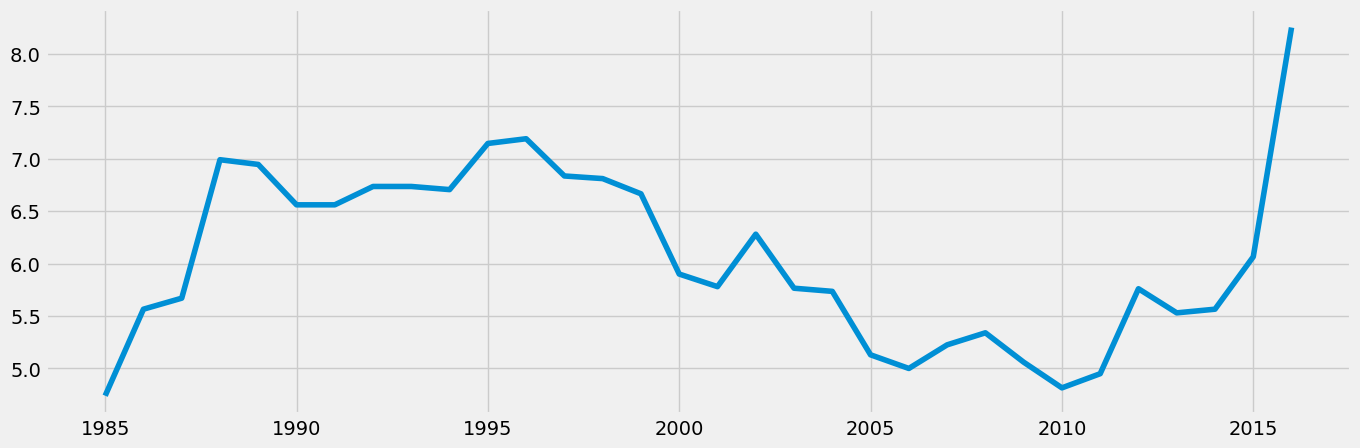

In [16]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### Cleaning time-series data

In [17]:
# Check for missing values

data.isnull().sum() 

suicide rate  median    0
dtype: int64

* No missing values

In [18]:
# Check for duplicates

dups = data.duplicated()
dups.sum()

2

* Leaving the duplicates as is because having the same suicide rate over two years is a possibility. 

___

### 3. Time-series Analysis: Decomposition

In [22]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=1)

In [23]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

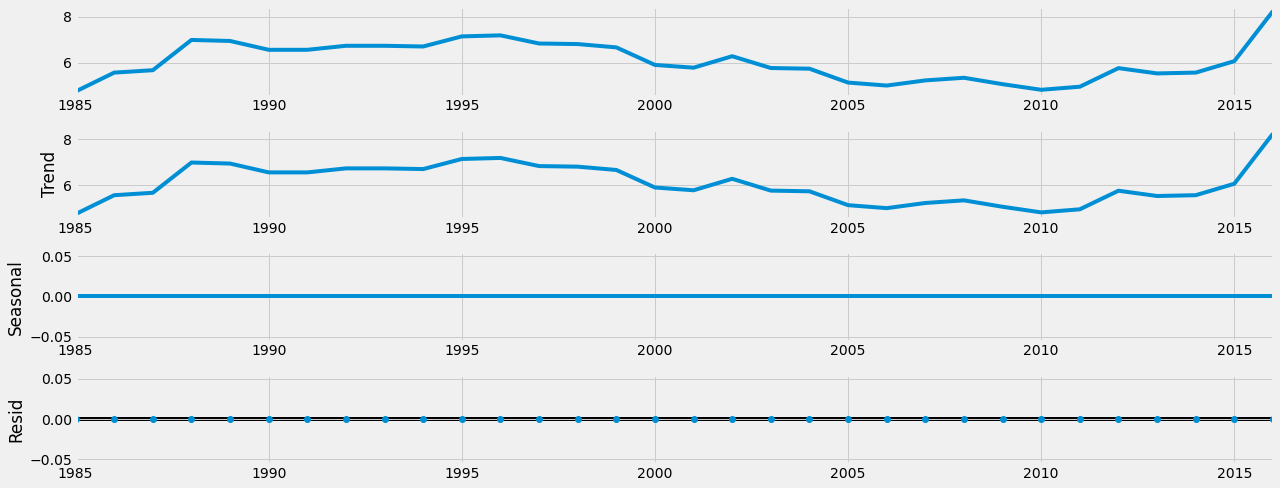

In [24]:
# Plotting decomposition of time-series data

decomposition.plot()
plt.show()

The level and trend tend to be the same as we're working with data that doesn't have much noise. As per the graph, we see minor fluctuations over the years however, post 2015, we see a sharp increase of suicide rates. 

___

### 4. Testing for stationarity

#### a. Dickey-Fuller Test

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['suicide rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.620141
p-value                         0.472655
Number of Lags Used             5.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


Observations: 

* H0 = Presence of a unit root (non-stationary)
* HA = Unit root present (stationary)
* The test statistic of -1.620141 is larger than the critical value (5%) of -2.981247, meaning the null hypothesis cannot be rejected.

#### b. Auto-Correlation Test

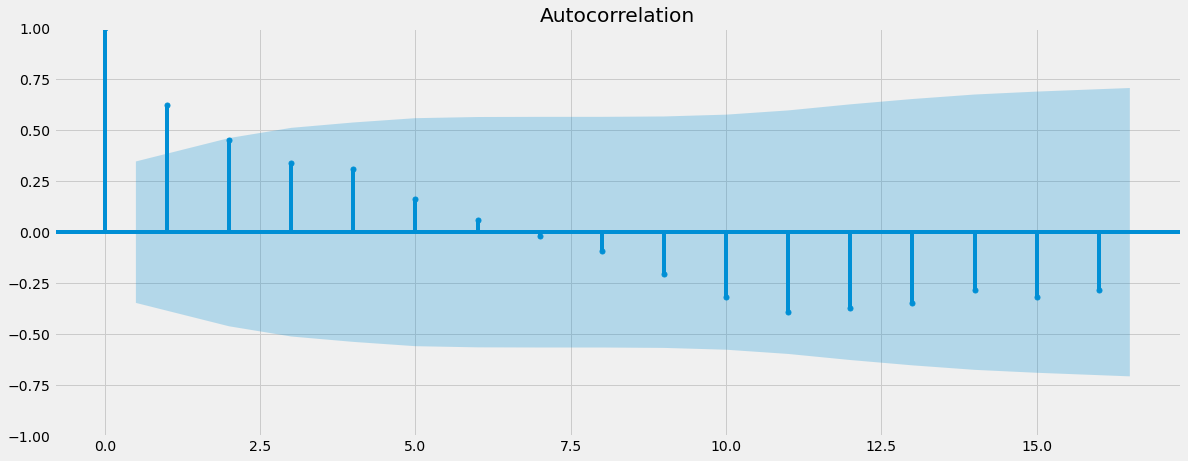

In [26]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

* The test shows that there are vertical lines that go above the blue edge of the confidence interval, indicating that the lags are significantly correlated with each other and the data is non-stationary.

___

### 5. Stationarizing the Global Suicides Rate Data

In [27]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [28]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [29]:
# Checking values and headers

data_diff.head()

,suicide rate
,median
year,
1986,0.825
1987,0.105
1988,1.320
1989,-0.045
1990,-0.385


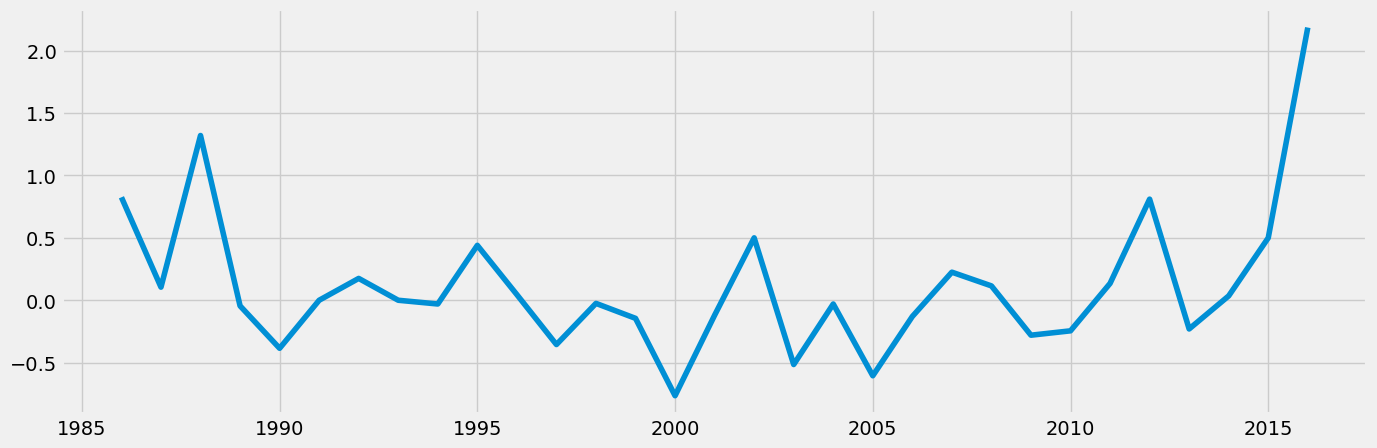

In [31]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.301798
p-value                         0.014798
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


* The results show that the data is now stationary. The test statistic value of -3.301798 is less than the critical value (5%) of -2.964071 and the p-value is smaller than 0.05. Therefore, the test result is significant and the null hypothesis can be rejected.

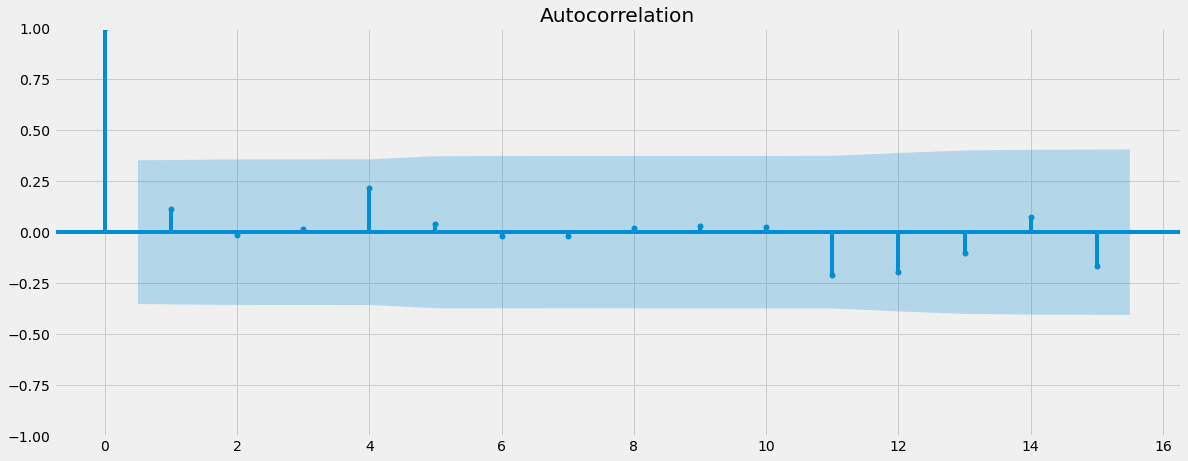

In [33]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

* The autocorrelation plot has improved. The stationary is strong due to no vertical lines going above the confidence interval.

___